<a href="https://colab.research.google.com/github/arshiyaakishore/MultiThreading-Assignment/blob/main/Arshiya_MultiTheading_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries.**

In [4]:
import numpy as np
import threading
import time
from tabulate import tabulate
import matplotlib.pyplot as plt

In [5]:
def multiply(A, B, result, index):
    result[index] = np.dot(A, B)

def run_threads(num_threads):
    start_time = time.time()
    threads = []
    for i, matrix in enumerate(matrices):
        thread = threading.Thread(target=multiply, args=(A, matrix, results, i))
        threads.append(thread)
        thread.start()
    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time


In [6]:
A = np.random.rand(2000, 2000)

results = [None] * 100

matrices = [np.random.rand(2000, 2000) for _ in range(100)]

results_table = []
num_threads=list(range(1,11))
time_taken=[]
for num_t in num_threads:
    ttime= run_threads(num_t)
    time_taken.append(ttime)
    results_table.append(("T= "+str(num_t), round(ttime,4)))

ans = list(zip(*results_table))
print(tabulate(ans,tablefmt="grid", showindex=["Threads", "Time taken (sec)"]))



+------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Threads          | T= 1    | T= 2    | T= 3    | T= 4    | T= 5    | T= 6    | T= 7    | T= 8    | T= 9    | T= 10   |
+------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Time taken (sec) | 59.7182 | 58.8341 | 61.1153 | 58.2231 | 59.4886 | 58.3603 | 58.3926 | 61.7964 | 59.4804 | 59.0436 |
+------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


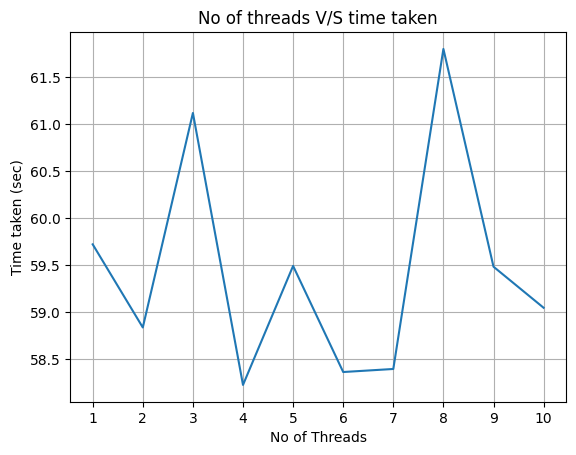

In [7]:
plt.plot(num_threads, time_taken)
plt.xlabel('No of Threads')
plt.ylabel('Time taken (sec)')
plt.title('No of threads V/S time taken')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()